In [2]:
import numpy as np  #linear algebra
import scipy.optimize
import random
import ast

In [3]:
def parseDataFromFile(fname):
    for l in open(fname):
        yield eval(l)

In [190]:
data = list(parseDataFromFile('data/fantasy_10000.json'))

In [191]:
data[0]    # check structure of data

{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'book_id': '18245960',
 'review_id': 'dfdbb7b0eb5a7e4c26d59a937e2e5feb',
 'rating': 5,
 'review_text': 'This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. \n It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I\'ve read. For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. \n It is a book about science, and aliens. The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell. Though when it got to folding protons into 8 dimensions I think he was just making stuff up - interesting to think about though. \n But what would 

Question 2

In [192]:
def feature_single(datum):
    f = [1]
    f.append(len(datum['review_text']))
    return f

In [193]:
Xs = [feature_single(d) for d in data]     #generate feature vector
ys = [d['rating'] for d in data]

In [194]:
theta,residuals,rank,s = np.linalg.lstsq(Xs,ys)
theta    #report θ0 and θ1

<ipython-input-194-a68a1c2f681d>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(Xs,ys)


array([3.68568136e+00, 6.87371675e-05])

In [195]:
MSE = residuals / 10000
MSE    #report MSE

array([1.55220866])

Question 3

In [196]:
def feature(datum):
    f = [1]
    f.append(len(datum['review_text']))
    t = dateutil.parser.parse(datum['date_added'])
    m = [0,0,0,0,0,0]
    if t.weekday() == 0:
        f.extend(m)
    else:
        m[t.weekday()-1] = 1
        f.extend(m)
    n = [0,0,0,0,0,0,0,0,0,0,0]
    if t.year == 2006:
        f.extend(n)
    else:
        n[t.year - 2007] = 1
        f.extend(n)
    return f

In [197]:
X = [feature(d) for d in data]

In [198]:
X[:2]     #feature vector of first two examples

[[1, 2086, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 1521, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

Question 4

In [199]:
y = [d['rating'] for d in data]     #one-hot encoding model
theta,residuals,rank,s = np.linalg.lstsq(X,y)
theta    #theta of one-hot encoding model

<ipython-input-199-4c5121dabb9b>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(X,y)


array([ 4.87171479e+00,  5.15709386e-05,  4.89003441e-02,  1.45709798e-01,
        1.06646403e-01,  1.26168316e-01,  3.83417660e-02,  1.02846903e-01,
       -1.58244783e+00, -1.70447417e+00, -1.68316056e+00, -1.67023905e+00,
       -1.62877001e+00, -1.19956705e+00, -1.10444816e+00, -1.09162361e+00,
       -1.20861354e+00, -1.23647487e+00, -1.23331225e+00])

In [200]:
MSE = residuals / 10000
MSE     #MSE of one-hot encoding model

array([1.51235787])

In [201]:
# use the weekday and year values directly as features
def feature_direct(datum):
    f = [1]
    f.append(len(datum['review_text']))
    t = dateutil.parser.parse(datum['date_added'])
    f.append(t.weekday())
    f.append(t.year)
    return f

In [202]:
Xd = [feature_direct(d) for d in data]
yd = [d['rating'] for d in data]
theta,residuals,rank,s = np.linalg.lstsq(Xd,yd)
theta    #theta of model with weekday and year values directly as features

<ipython-input-202-798ff6c695af>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta,residuals,rank,s = np.linalg.lstsq(Xd,yd)


array([-1.01742461e+02,  5.50923292e-05,  8.75072300e-03,  5.23592268e-02])

In [203]:
MSE = residuals / 10000
MSE      #MSE of model with weekday and year values directly as features

array([1.53677405])

Question 5

In [204]:
#import package to split data
from sklearn.model_selection import train_test_split    

In [205]:
#for one-hot encoding model
#split one-hot encoing data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y, test_size = 0.5)
X_train_1[:10]

[[1, 274, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 23, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 95, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 140, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 212, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 160, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 3821, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 429, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 692, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [206]:
X_train_1 = np.array(X_train_1)
X_test_1 = np.array(X_test_1) 
y_train_1 = np.array(y_train_1) 
y_test_1 = np.array(y_test_1)
X_train_1.shape

(5000, 19)

In [207]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
model = linear_model.LinearRegression(fit_intercept=False)
model.fit(X_train_1,y_train_1)   # train the one-hot encoding model

LinearRegression(fit_intercept=False)

In [208]:
y_train_1_predict = model.predict(X_train_1)  # predict with one-hot encoding
MSE = mean_squared_error(y_train_1, y_train_1_predict)
MSE      # MSE of one-hot encoding model of train set

1.5228347588233306

In [209]:
y_1_predict = model.predict(X_test_1)
MSE = mean_squared_error(y_test_1, y_1_predict)
MSE     # MSE of one-hot encoding model of test set

1.5062777490946602

In [210]:
# split easy_model data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(Xd,yd, test_size = 0.5)
X_train_2 = np.array(X_train_2)
X_test_2 = np.array(X_test_2) 
y_train_2 = np.array(y_train_2) 
y_test_2 = np.array(y_test_2)
X_train_2.shape

(5000, 4)

In [211]:
model = linear_model.LinearRegression(fit_intercept=False)
model.fit(X_train_2,y_train_2)       # train the easy model
y_train_2_predict = model.predict(X_train_2)
MSE = mean_squared_error(y_train_2, y_train_2_predict)
MSE        # MSE of model with weekday and year values directly as features of train set

1.4930886960849377

In [212]:
y_2_predict = model.predict(X_test_2)
MSE = mean_squared_error(y_test_2, y_2_predict)
MSE  # MSE of model with weekday and year values directly as features of test set

1.5821906919022972

Question 6 
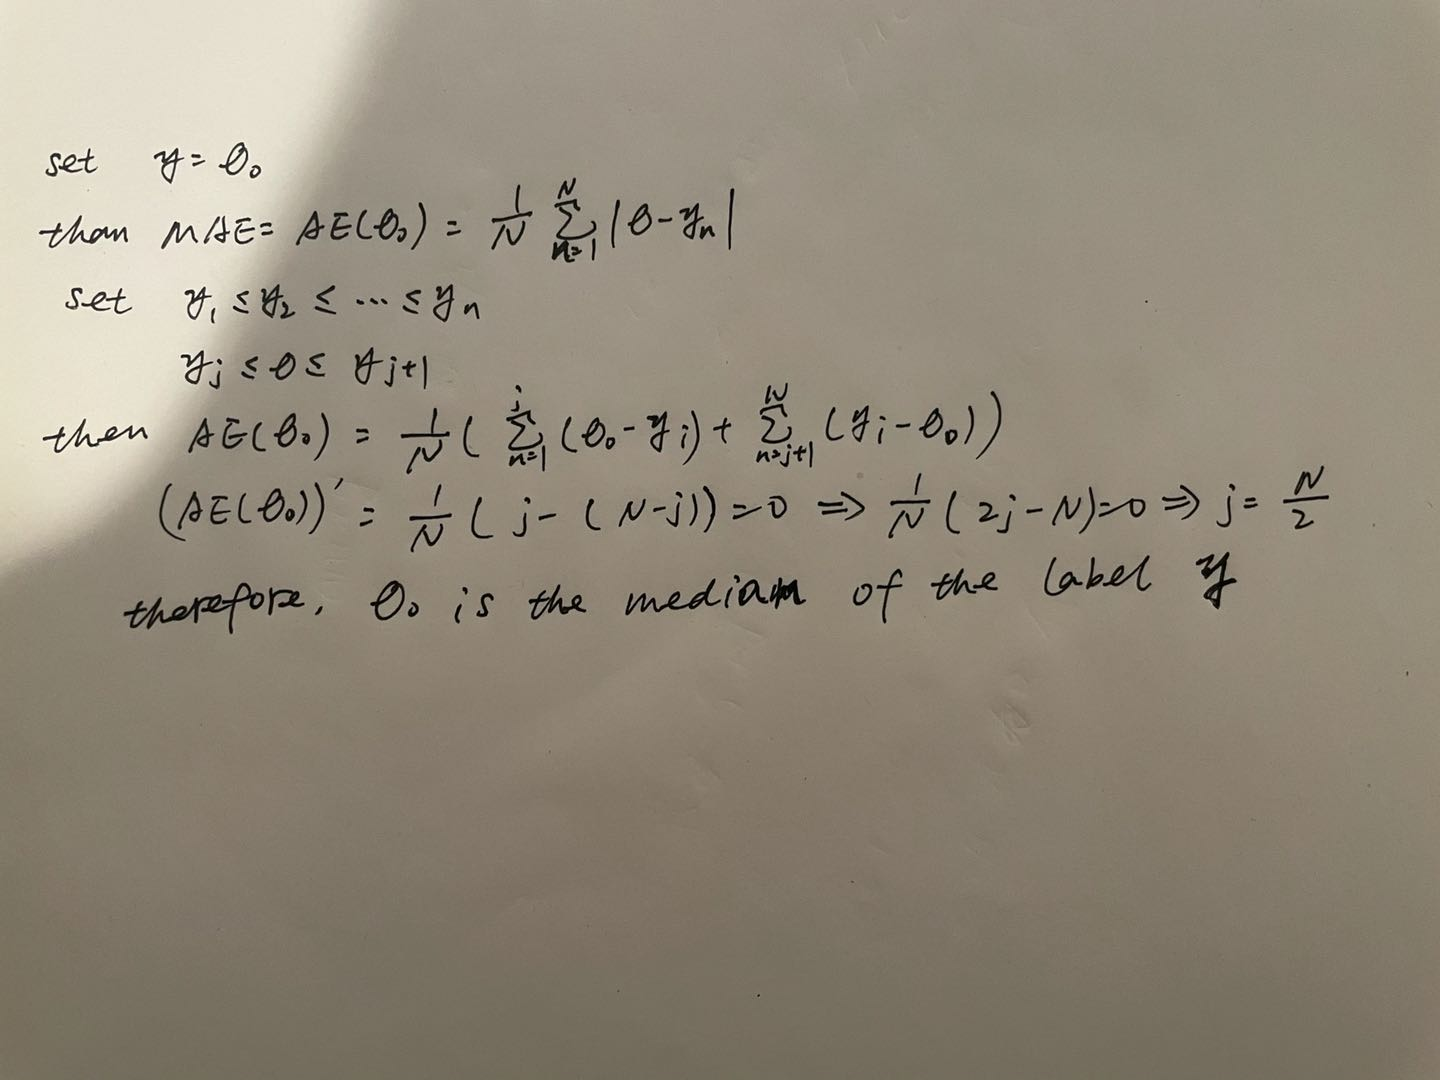

WEEK 2

Question 7

In [5]:
data = list(parseDataFromFile('beer_50000.json'))

In [6]:
data[0]

{'review/appearance': 2.5,
 'beer/style': 'Hefeweizen',
 'review/palate': 1.5,
 'review/taste': 1.5,
 'beer/name': 'Sausa Weizen',
 'review/timeUnix': 1234817823,
 'beer/ABV': 5.0,
 'beer/beerId': '47986',
 'beer/brewerId': '10325',
 'review/timeStruct': {'isdst': 0,
  'mday': 16,
  'hour': 20,
  'min': 57,
  'sec': 3,
  'mon': 2,
  'year': 2009,
  'yday': 47,
  'wday': 0},
 'review/overall': 1.5,
 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.',
 'user/profileName': 'stcules',
 'review/aroma': 2.0}

In [7]:
y = [d['review/overall'] >= 4 for d in data]

In [9]:
def feature_2(datum):
    f = [1]
    f.append(len(datum['review/text']))
    return f

In [10]:
X = [feature_2(d) for d in data]  #feature vector

In [16]:
mod = linear_model.LogisticRegression(C=1.0, class_weight = 'balanced')

In [18]:
# train and predict
mod.fit(X,y)
pred = mod.predict(X)

In [19]:
# check the result
correct = pred == y

In [21]:
TP_ = np.logical_and(pred, y)
FP_ = np.logical_and(pred, np.logical_not(y))
TN_ = np.logical_and(np.logical_not(pred), np.logical_not(y))
FN_ = np.logical_and(np.logical_not(pred), y)

In [22]:
TP_

array([False, False, False, ..., False,  True, False])

In [344]:
#calculate TP, FP, TN, FN
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

In [345]:
#calculate TPR and TNR
TPR = TP/(TP+FN) # for those are positive in reality, what percentage is rightly predicted?
TNR = TN/(FP+TN) # for those are negative in reality, what percentage is rightly predicted?

In [346]:
Balanced_Error_Rates = 1 - 1/2 * (TPR + TNR)
Balanced_Error_Rates

0.4683031525957275

In [347]:
#print values needed to be reported
print('True Positive: %d' %TP)
print('True Negative: %d' %TN)
print('False Positve: %d' %FP)
print('False Negative: %d' %FN)
print('Balanced_Error_Rates: %.8f' %Balanced_Error_Rates)

True Positive: 14201
True Negative: 10503
False Positve: 5885
False Negative: 19411
Balanced_Error_Rates: 0.46830315


Question 8

In [243]:
scores = mod.decision_function(X)
scores_labels = list(zip(scores, y))

In [246]:
scores_labels.sort(reverse = True)    #sort values by confidence scores
scores_labels[:10]

[(1.4203973087785076, True),
 (1.4087148118810089, True),
 (1.3478242219910155, True),
 (1.312776731298519, True),
 (1.285871586928522, True),
 (1.2582584124435248, True),
 (1.2239189518660285, False),
 (1.199491912898531, True),
 (1.1803750997935332, True),
 (1.174356843816034, False)]

In [247]:
sortedlabels = [x[1] for x in scores_labels]

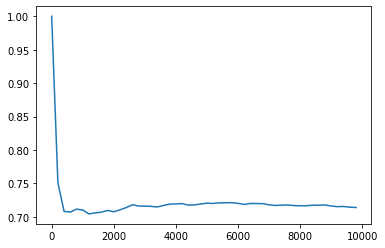

In [284]:
#draw the graph of precision@K with the change of K
x = np.arange(1, 10001,200)
y = []
for m in x:
    y.append(sum(sortedlabels[:m])/m)
plt.plot(x,y)
plt.show()

Question 9

In [294]:
scores_labels[:20]

[(1.4203973087785076, True),
 (1.4087148118810089, True),
 (1.3478242219910155, True),
 (1.312776731298519, True),
 (1.285871586928522, True),
 (1.2582584124435248, True),
 (1.2239189518660285, False),
 (1.199491912898531, True),
 (1.1803750997935332, True),
 (1.174356843816034, False),
 (1.171170708298534, True),
 (1.1573641210560357, True),
 (1.143203518756037, True),
 (1.1410794284110373, False),
 (1.133999127261038, True),
 (1.133999127261038, True),
 (1.1063859527760411, True),
 (1.1049698925460412, True),
 (1.0978895913960418, True),
 (1.0798348234635435, True)]

In [306]:
# define a function to check whether has the right prediction and record it
def determination(i):
    i = list(i)
    if i[0]> 0 and i[1] == True:
        m = 1
    elif i[0]<0 and i[1] == False:
        m = 1
    else:
        m = 0
    # use the absolute value of confidence scores to represent the confidence
    i[0] = np.abs(i[0])    
    i.append(m)
    return i

In [308]:
brian = [determination(d) for d in scores_labels]
brian[9980:10000]

[[0.08682258717614921, True, 1],
 [0.08682258717614921, True, 1],
 [0.08682258717614921, True, 1],
 [0.08682258717614921, True, 1],
 [0.08682258717614921, True, 1],
 [0.08682258717614921, True, 1],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08682258717614921, False, 0],
 [0.08646857211864922, True, 1]]

In [309]:
brian.sort(reverse = True)
brian[9980:10000]    #check the result after sorting

[[0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0],
 [0.13868500445132687, True, 0]]

In [310]:
brianlabels = [x[2] for x in brian]

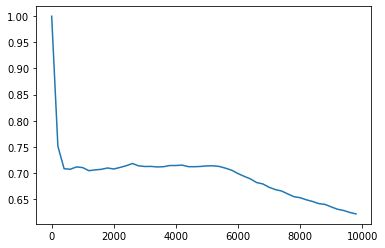

In [332]:
#draw the graph of precision@K with the change of K
x = np.arange(1, 10001,200)
y = []
for m in x:
    y.append(sum(brianlabels[:m])/m)
plt.plot(x,y)
plt.show()

In [331]:
#report precision@K for K = 1, 100, 10000
precision1 = sum(brianlabels[:1])/1
precision100 = sum(brianlabels[:100])/100
precision10000 = sum(brianlabels[:10000])/10000
print(precision1)
print(precision100)
print(precision10000)

1.0
0.75
0.6183
